# Por qué hasta ahora?

La razón de enseñarles hasta ahora este paquete, es que no lo conocía antes. Julia es un lenguaje muy nuevo, por lo que constantemente está auto-mejorándose. 

# Para qué aprender un nuevo paquete de gráficos?

Porque es más general, con él podrán hacer muchas "monerías". 

# Cómo lo instalo?

Como siempre, para instalar el paquete hay que poner primero: 

Pkg.add("Plots")

Conviene después checar que se trate de la última actualización. Para esto escribimos: 

Pkg.checkout("Plots")

Finalmente, será buena idea tener una serie de paquetes de gráficos que puedan ayudar en un futuro. Todos dentro de la misma paquetería de "Plots"

Pkg.add("GR")

Pkg.add("UnicodePlots")

Pkg.add("PlotlyJS")

Pkg.add("StatPlots")

Pkg.add("PlotRecipes")

Esto instalará todos los paquetes necesarios para usar Plots. Sequido a esto hay que escribir, como siempre: **using Plots**

Ahora sí, ya podemos comenzar

In [1]:
using Plots

Lo primero que hay que notar en Plots, es que es más fácil graficar. Por ejemplo, uno puede graficar la función sin(x) simplemente escribiendo: 


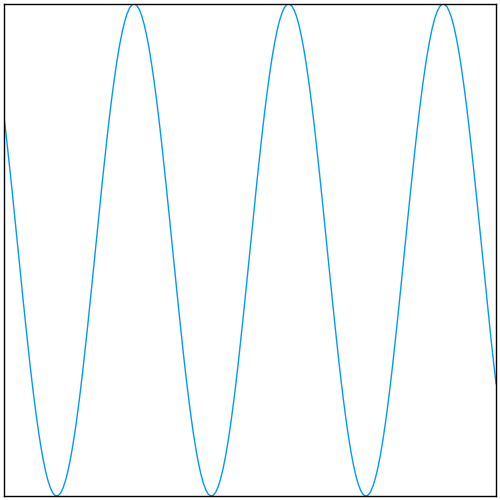

In [16]:
x = -10:0.1:10
plot(sin(x))

también se puede, como en PyPlot, escribir: 


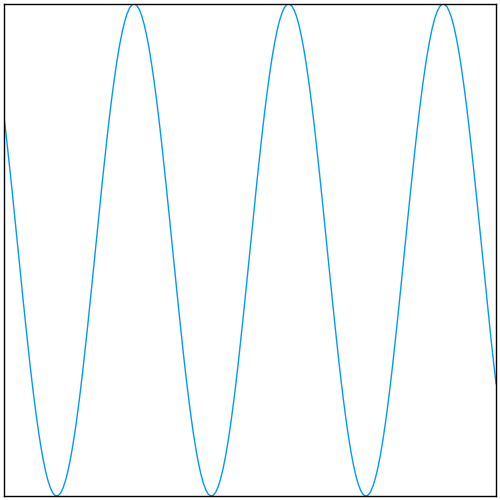

In [17]:
plot(x,sin(x))

Si uno lo que quiere es graficar una serie de puntos, en vez de lineas, uno puede hacerlo de varias formas: 


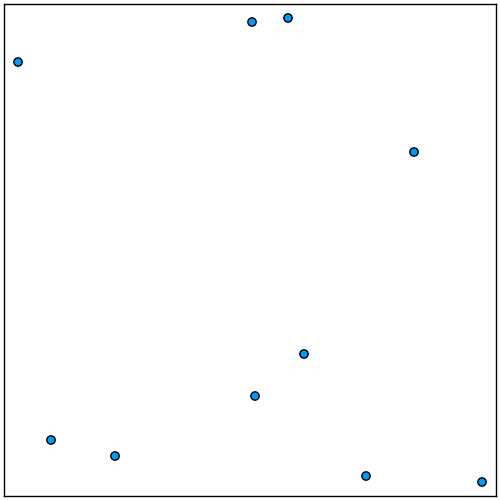

In [30]:
scatter(rand(10),rand(10))


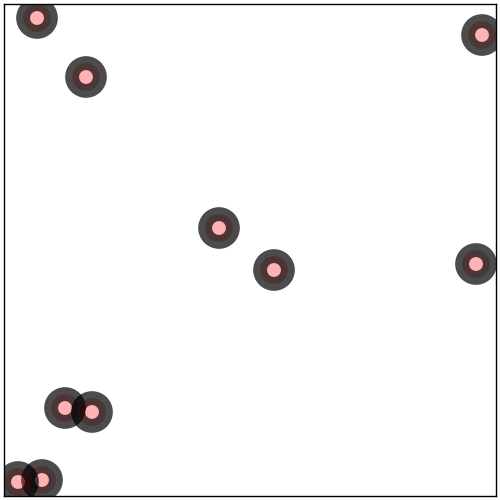

In [38]:
plot(rand(10),rand(10),st =:scatter, 
color=:red, markersize = 20, markerstrokewidth = 10, alpha = 0.3, markerstrokealpha = 0.7)

Pondré un ejemplo de una gráfica con muchos detalles. 



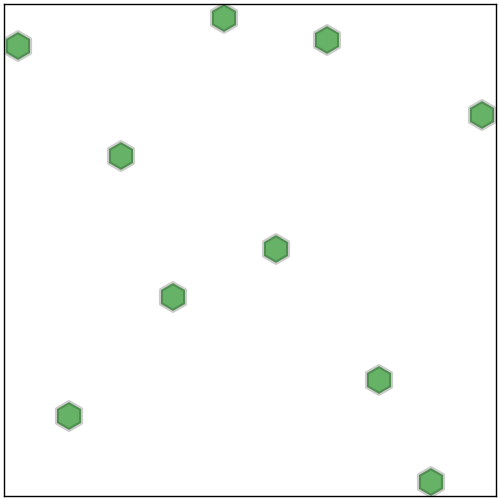

In [44]:
scatter(rand(10), marker = (:hexagon, 20, 0.6, :green, stroke(3, 0.2, :black, :dot)))

scatter(rand(10), markershape = :hexagon,
           markersize = 20,
           markeralpha = 0.6,
           markercolor = :green,
           markerstrokewidth = 3,
           markerstrokealpha = 0.2,
           markerstrokecolor = :black,
           markerstrokestyle = :dot)

Como muestra del poder de Plots, pondré aquí el desarrollo de un logo: 


In [72]:
pyplot(leg = false, grid = false, xticks = nothing, yticks = nothing, size=(500,500))

# Aquí ponemos algunos detalles sobre el gráfico. 1) será graficado usando PyPlot. 
# 2) no se pone nada que no sea lo que dibujaremos. 

Plots.PyPlotBackend()

Ahora hacemos nuestra función de logo.


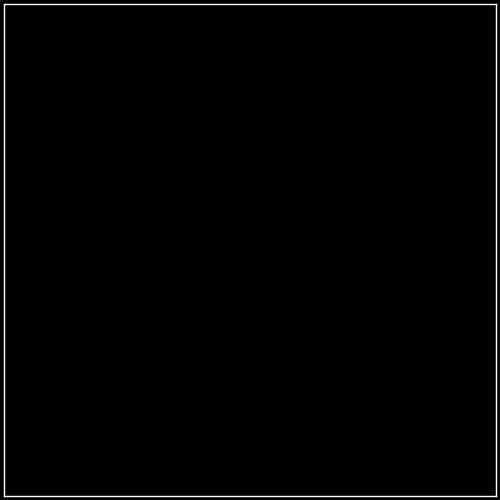

In [73]:
function make_logo()
    p = P2[(0,0), (0.5, 0.2), (1, 0), (1,2),  (0.3,1.2), (0.2,2), (0,1.7)]
    m = P2[(p[i]+p[i+1])/2 for i=1:length(p)-1]
    m += P2[(0.2, 1), (0.4, 1), (2, 0), (0.5, -0.6), (0,0), (0,-0.15)]

    pts = P2[]
    for (i,mi) in enumerate(m)
        append!(pts, curve_points(BezierCurve(P2[p[i], m[i], p[i+1]])))
    end
    x, y = Plots.unzip(pts)
    Shape(vcat(x, -reverse(x)), vcat(y, reverse(y)))
end

# Ponemos el fondo en negro: 

plt = plot(bg = :black, xlim = (0.1,0.9), ylim = (0.2,1.5))




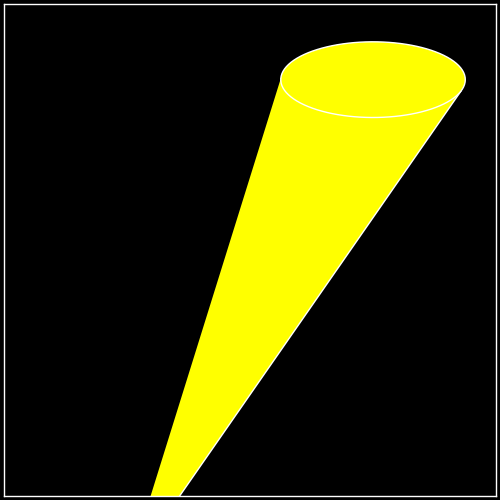

In [74]:
# Ahora necesitamos una luz para proyectar nuestro logo

pts = Plots.partialcircle(0,2π,100,0.1)
x, y = Plots.unzip(pts)
x = 1.5x + 0.7
y += 1.3
pts = collect(zip(x, y))
beam = Shape([(0.3, 0.0), pts[95], pts[50]])
plot!(beam, color=:yellow)
plot!(Shape(x,y), color=:yellow)


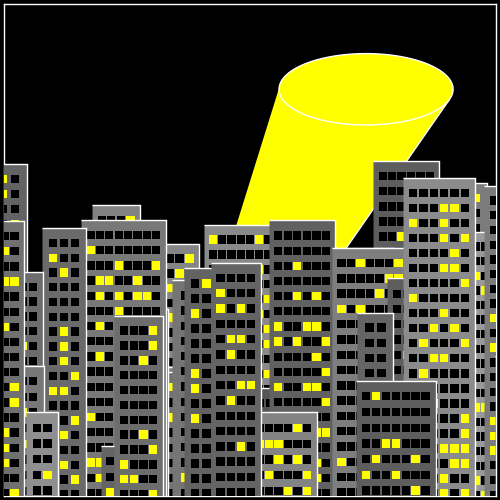

In [75]:
# Ahora necesitamos un público que vea nuestro logo: 

rect(w, h, x, y) = Shape(x + [0,w,w,0], y + [0,0,h,h])
gray(pct) = RGB(pct,pct,pct)
function windowrange(dim, denom)
    linspace(0, 1, max(3, round(Int, dim/denom)))[2:end-1]
end

for k=1:50
    w, h, x, y = 0.1rand()+0.05, 0.8rand()+0.3, rand(), 0.0
    shape = rect(w, h, x, y)
    graypct = 0.3rand()+0.3
    plot!(shape, c = gray(graypct))
    
    # windows
    I = windowrange(w,0.015)
    J = windowrange(h,0.04)
    pts = vec([(Float64(x+w*i), Float64(y+h*j)) for i=I,j=J])
    windowcolors = Symbol[rand()<0.2 ? :yellow : :black for i=1:length(pts)]
    scatter!(pts, marker = (stroke(0), :rect, windowcolors))
end
plt


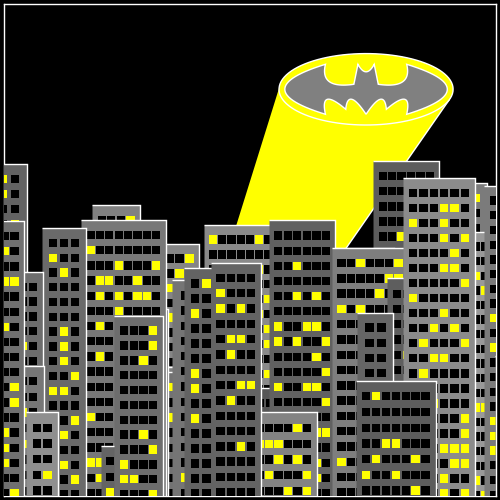

In [76]:
#Ya estamos listos, ahora sólo falta proyectar nuestro logo!!

logo = scale(make_logo(), 0.07, 0.07, (0,0))
logo = translate(logo, 0.7, 1.23)
plot!(logo, color= :gray, size=(500,500))

Ok, ya se ve que Plots tiene muchísimas posibles aplicaciones!!! pero quizá siga siendo poco impresionante. Es decir, 
con PyPlot, haciendo un poco de esfuerzo, seguramente también hubiéramos podido hacer esta imagen. 

Pasemos entonces a una aplicación más impresionante, **Animaciones**

En este punto del curso, empieza a ser necesario hacer bonitas animaciones de lo que van obteniendo. Una forma de hacerlo, es "a mano". Pero es una forma horrible de hacerlo. 

Una animación típica tiene por lo menos 5 cuadros por segundo, por lo que hacer una animación de 10 segundos se vuelve tortuoso si no se puede automatizar. 

En PyPlot no hay una forma fácil de automatizar las cosas. En Plots sí la hay. 

In [80]:
anim = @animate for i=1:100
    plot(rand(10), rand(10))
end
gif(anim, "anim_fps15.gif", fps = 15)

INFO: Saved animation to /Users/atahualpa/anim_fps15.gif


Plots.AnimatedGif("/Users/atahualpa/anim_fps15.gif")

In [81]:
#o simplemente

@gif for i=1:100
    plot(rand(10), rand(10))
end
# si no se quiere poner una cantidad específica de frames por segundo

INFO: Saved animation to /Users/atahualpa/tmp.gif


Plots.AnimatedGif("/Users/atahualpa/tmp.gif")

Esto se vuelve interesante inmediatamente. 

[1] Usa este paquete para graficar la trayectoria de una bala con velocidad inicial $v_0$, fricción del aire $\mu$ y aceleración de la gravedad $g$ 

[2] Considera ahora los efectos de la gravedad debido a la distancia de la bala con la tierra. Haz también una animación. 

[3] Haz una animación de los planetas al rededor del sol. 

[4] Haz una animación de la trayectoria de un péndulo doble. 

[5] Resuelve el sistema de ecuaciones diferenciales del modelo de Lorenz y grafica (anima) varias trayectorias. 

[6] Haz la animación de un sistema de 3 cuerpos atraidos gravitatoriamente. ¿Puedes encontrar trayectorias que no colapsen o se expandan indefinidamente?

[7] Jueeega con estas herramientas y los que ya has aprendido para resolver ecuaciones diferenciales y ecuaciones algebráicas. 

Las ecuaciones diferenciales del Modelo de Lorenz son :

$ \frac{dx}{dt} = \sigma (y-x)$

$ \frac{dy}{dt} = x(\rho-x) - y$

$ \frac{dz}{dt} = x y - \beta z$

